## Accelerated Gradient Descent Methods (Momentum/AdaGrad/RMSProp/ADAM)

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a= -2
b = 1
x = np.linspace(0, 20, 100)
y = a * x + b + np.random.normal(0, 1, x.shape)

In [3]:
x

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [4]:
y

array([  0.35927365,  -0.10697103,  -1.70626085,  -0.9527889 ,
        -0.5448293 ,  -2.19943961,  -0.55633233,  -2.87466636,
        -3.46452636,  -2.04484652,  -3.49308912,  -4.32386465,
        -4.21671388,  -6.13056314,  -3.77792892,  -4.32468861,
        -4.92195186,  -8.1489744 ,  -4.60970726,  -5.45805737,
        -5.94288108,  -6.33359235,  -9.24493548,  -9.09830062,
        -9.22084794, -10.22814464, -10.6658899 ,  -8.90321386,
        -9.67367018,  -9.40883654,  -9.15783868, -12.53876658,
       -11.0705678 , -14.40665536, -13.75449525, -12.76167584,
       -12.3384362 , -14.62761005, -12.2576066 , -15.39477697,
       -14.85912849, -17.09498211, -14.06917165, -16.11979038,
       -17.26565288, -15.81303367, -17.30489984, -19.84725177,
       -19.18895349, -19.54129113, -19.38288818, -19.70195255,
       -19.83101807, -21.01391424, -20.03715666, -22.15499103,
       -21.3764137 , -20.54202573, -22.68661268, -22.42567241,
       -23.23476863, -23.27354264, -25.47687539, -23.53

#### Plot your data points. 

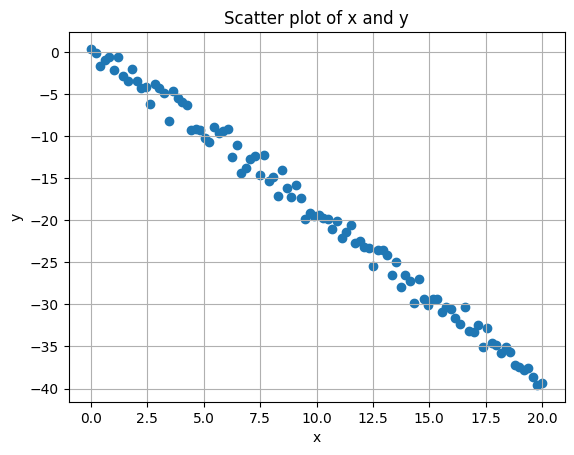

In [5]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.grid()
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [6]:
def BGD(X, Y, alpha,max_iter):
    theta_0 =0
    theta_1 = 0
    tol = 1e-4
    epochs = 0
    loss = []
    theta0 = []
    theta1 = []
    ypred = []
    for i in range(max_iter):
        y_pred = theta_0 + theta_1 * X
        ypred.append(y_pred)
        
        J = (1/(2*len(X))) * np.sum((y_pred - Y)**2)
        loss.append(J)

        grad_0 = (1/len(X)) * np.sum(y_pred - Y)
        grad_1 = (1/len(X)) * np.sum((y_pred - Y) * X)

        theta_0 = theta_0 - alpha * grad_0 
        theta_1 = theta_1 - alpha * grad_1
        theta0.append(theta_0)
        theta1.append(theta_1)

        if len(loss) > 1 and abs(loss[-2] - loss[-1]) <= tol:
            print(f"Converged after {i+1} iterations.")
            break

        epochs += 1


    return theta0, theta1, loss, ypred, theta_0, theta_1, epochs

In [7]:
theta0, theta1, loss, ypred, theta_0, theta_1, epochs = BGD(x, y, 0.001, 1000)

Converged after 51 iterations.


In [8]:
r2_score(y, ypred[-1])

0.9908423424968963

In [9]:
SS_tot = np.sum((y - np.mean(y))**2)
SS_res = np.sum((y - ypred[-1])**2)
R2 = 1 - (SS_res/SS_tot)
R2

0.9908423424968963

#### Plot loss vs. epochs

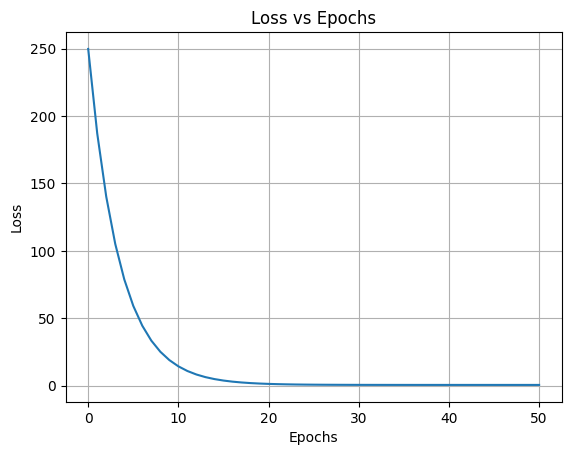

In [10]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

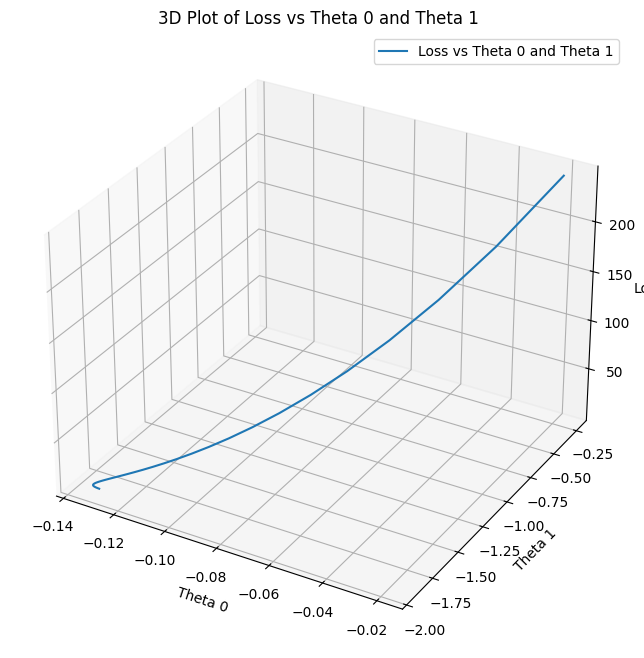

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(theta0, theta1, loss, label='Loss vs Theta 0 and Theta 1')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Loss')
ax.set_title('3D Plot of Loss vs Theta 0 and Theta 1')
ax.legend()
plt.show()


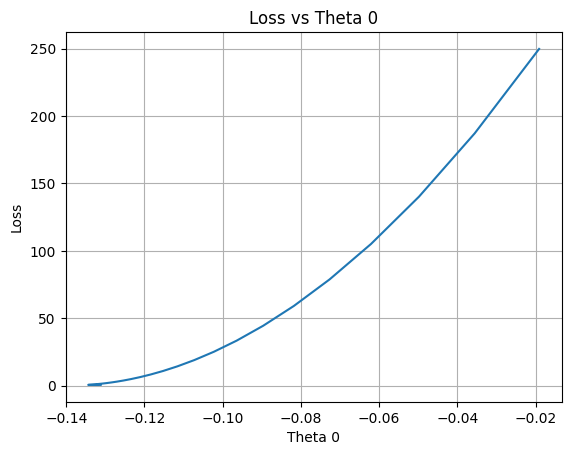

In [12]:
plt.plot(theta0,loss)
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Loss vs Theta 0')
plt.grid()
plt.show()

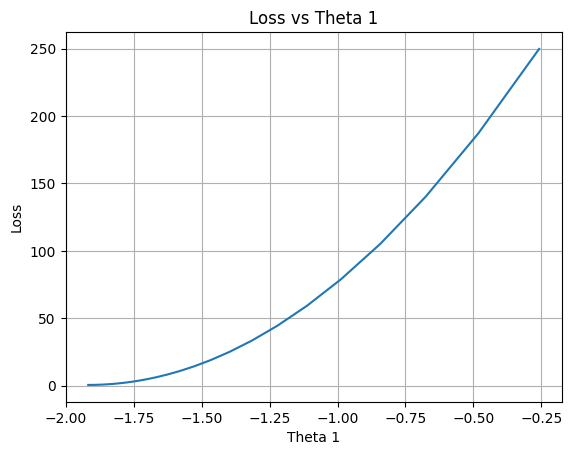

In [13]:
plt.plot(theta1,loss)
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Loss vs Theta 1')
plt.grid()
plt.show()

In [14]:
import plotly.graph_objects as go

def plot_3d(x, y, t0, t1, loss):
    fig = go.Figure()

    t0_range = np.linspace(min(t0), max(t0), 100)
    t1_range = np.linspace(min(t1), max(t1), 100)
    T0, T1 = np.meshgrid(t0_range, t1_range)

    Z = np.array([np.sum((y - (t0_val + t1_val * x))**2) / (2 * len(x)) for t0_val, t1_val in zip(np.ravel(T0), np.ravel(T1))])
    Z = Z.reshape(T0.shape)

    fig.add_trace(go.Surface(x=T0, y=T1, z=Z, colorscale='Viridis', opacity=0.7, name='Loss Surface'))

    fig.add_trace(go.Scatter3d(x=t0, y=t1, z=loss, mode='lines+markers', marker=dict(size=5, color='red'), line=dict(color='red', width=2), name='Gradient Descent Path'))

    fig.update_layout(scene=dict(
                        xaxis_title='Theta 0',
                        yaxis_title='Theta 1',
                        zaxis_title='Loss'),
                      title='3D Gradient Descent',
                      autosize=False,
                      width=800, height=800,
                      margin=dict(l=65, r=50, b=65, t=90))

    fig.show()

plot_3d(x, y, theta0, theta1, loss)

#### Plot all regression lines till converge

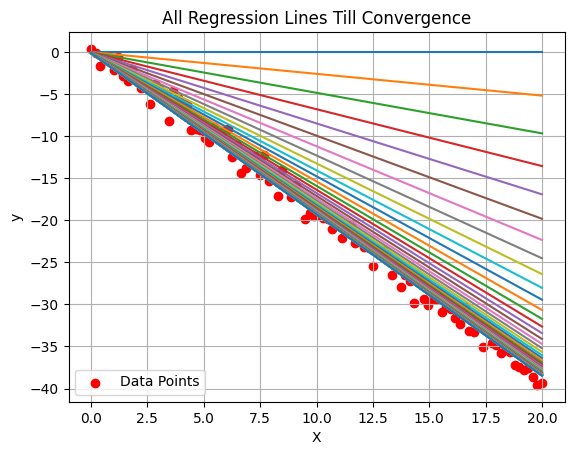

In [15]:
for i in range(len(ypred)):
    plt.plot(x, ypred[i])

plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines Till Convergence')
plt.legend()
plt.grid()
plt.show()

#### Plot the best regression line

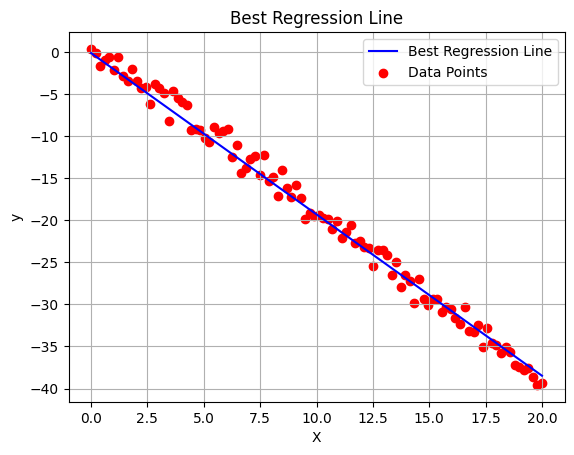

In [16]:
best_ypred = theta_0 + theta_1 * x

plt.plot(x, best_ypred, label='Best Regression Line', color='blue')
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Regression Line')
plt.legend()
plt.grid()
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

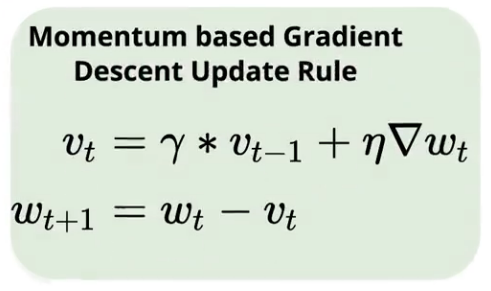

#### γ takes values between 0 and 1.
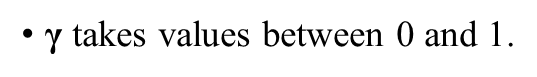

In [17]:
def MomentumBGD(X, Y, alpha, max_iter, gamma):
    theta_0 = 0
    theta_1 = 0
    tol = 1e-4
    epochs = 0
    loss = []
    theta0 = []
    theta1 = []
    ypred = []
    v0 = 0
    v1 = 0
    
    for i in range(max_iter):
        y_pred = theta_0 + theta_1 * X
        ypred.append(y_pred)
        
        J = (1/(2*len(X))) * np.sum((y_pred - Y)**2)
        loss.append(J)

        grad_0 = (1/len(X)) * np.sum(y_pred - Y)
        grad_1 = (1/len(X)) * np.sum((y_pred - Y) * X)

        v0 = gamma * v0 + alpha * grad_0
        v1 = gamma * v1 + alpha * grad_1

        theta_0 = theta_0 - v0
        theta_1 = theta_1 - v1
        theta0.append(theta_0)
        theta1.append(theta_1)

        if len(loss) > 1 and abs(loss[-2] - loss[-1]) <= tol:
            print(f"Converged after {i+1} iterations.")
            break

        epochs += 1

    return theta0, theta1, loss, ypred, theta_0, theta_1, epochs

In [18]:
theta0, theta1, loss, ypred, theta_0, theta_1, epochs = MomentumBGD(x, y, 0.01, 1000, 0.9)

Converged after 102 iterations.


In [19]:
r2_score(y, ypred[-1])

0.9923822224334027

In [20]:
SS_tot = np.sum((y - np.mean(y))**2)
SS_res = np.sum((y - ypred[-1])**2)
R2 = 1 - (SS_res/SS_tot)
R2

0.9923822224334027

#### Plot loss vs. epochs

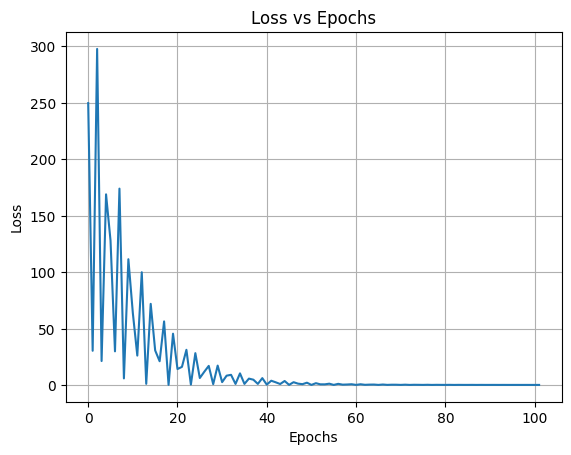

In [21]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

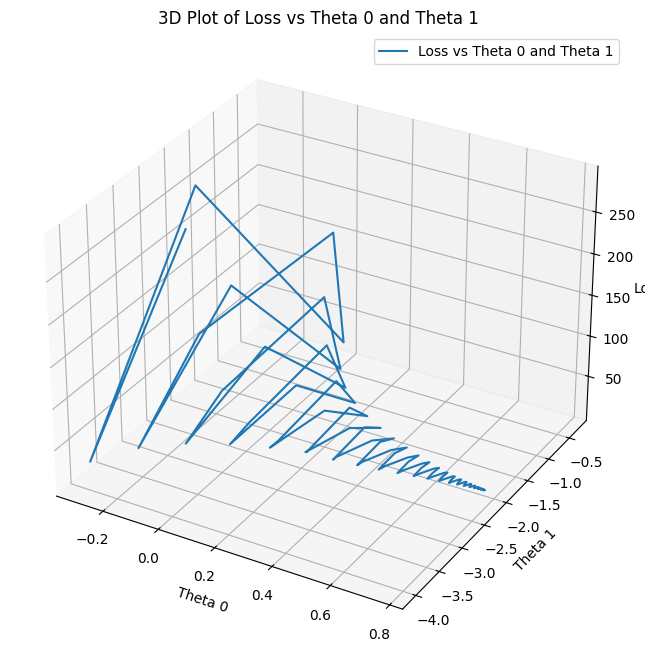

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(theta0, theta1, loss, label='Loss vs Theta 0 and Theta 1')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Loss')
ax.set_title('3D Plot of Loss vs Theta 0 and Theta 1')
ax.legend()
plt.show()

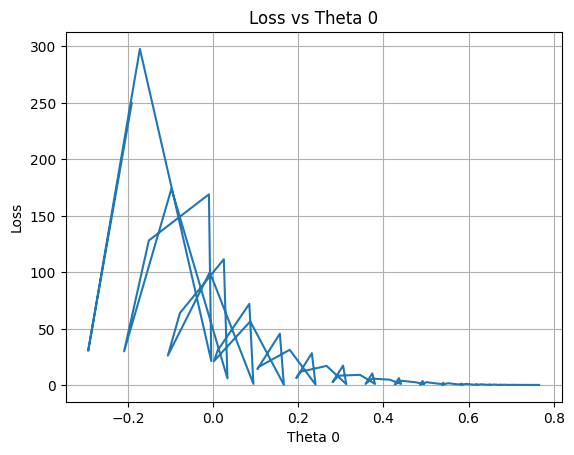

In [23]:
plt.plot(theta0,loss)
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Loss vs Theta 0')
plt.grid()
plt.show()


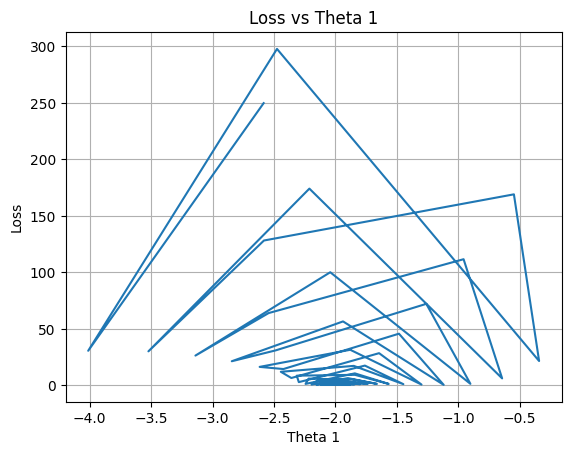

In [24]:
plt.plot(theta1,loss)
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Loss vs Theta 1')
plt.grid()
plt.show()

In [25]:
plot_3d(x, y, theta0, theta1, loss)

#### Plot all regression lines till converge

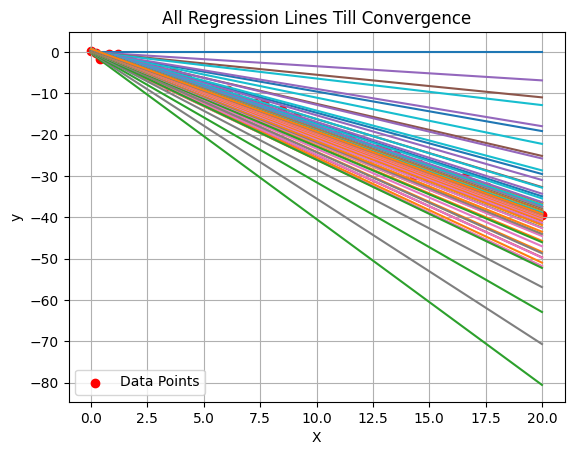

In [26]:
for i in range(len(ypred)):
    plt.plot(x, ypred[i])

plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines Till Convergence')
plt.legend()
plt.grid()
plt.show()

#### Plot the best regression line

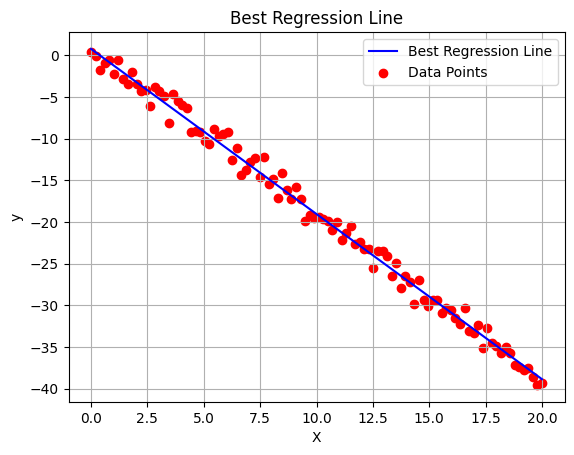

In [27]:
best_ypred = theta_0 + theta_1 * x

plt.plot(x, best_ypred, label='Best Regression Line', color='blue')
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Regression Line')
plt.legend()
plt.grid()
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [28]:
theta0, theta1, loss, ypred, theta_0, theta_1, epochs = MomentumBGD(x, y, 0.01, 1000, 0.5)

Converged after 243 iterations.


In [29]:
r2_score(y, ypred[-1])

0.9923282244506648

In [30]:
theta0, theta1, loss, ypred, theta_0, theta_1, epochs = MomentumBGD(x, y, 0.01, 1000, 0)

Converged after 347 iterations.


In [31]:
r2_score(y, ypred[-1])

0.9921815703395839

### Update your Batch GD for one variable  implementation to be AdaGrad and check your results

In [32]:
def AdaGradBGD(X, Y, alpha, max_iter, epsilon):
    theta_0 = 0
    theta_1 = 0
    tol = 1e-4
    epochs = 0
    loss = []
    theta0 = []
    theta1 = []
    ypred = []
    G0 = 0
    G1 = 0
    
    for i in range(max_iter):
        y_pred = theta_0 + theta_1 * X
        ypred.append(y_pred)
        
        J = (1/(2*len(X))) * np.sum((y_pred - Y)**2)
        loss.append(J)

        grad_0 = (1/len(X)) * np.sum(y_pred - Y)
        grad_1 = (1/len(X)) * np.sum((y_pred - Y) * X)

        G0 += grad_0**2
        G1 += grad_1**2

        theta_0 = theta_0 - (alpha / (np.sqrt(G0) + epsilon)) * grad_0
        theta_1 = theta_1 - (alpha / (np.sqrt(G1) + epsilon)) * grad_1
        theta0.append(theta_0)
        theta1.append(theta_1)

        if len(loss) > 1 and abs(loss[-2] - loss[-1]) <= tol:
            print(f"Converged after {i+1} iterations.")
            break

        epochs += 1

    return theta0, theta1, loss, ypred, theta_0, theta_1, epochs

In [33]:
theta0, theta1, loss, ypred, theta_0, theta_1, epochs = AdaGradBGD(x, y, 0.01, 30000, 1e-8)

Converged after 22290 iterations.


In [34]:
r2_score(y, ypred[-1])

0.9750567185769372

In [35]:
SS_tot = np.sum((y - np.mean(y))**2)
SS_res = np.sum((y - ypred[-1])**2)
R2 = 1 - (SS_res/SS_tot)
R2

0.9750567185769372

#### Plot loss vs. epochs

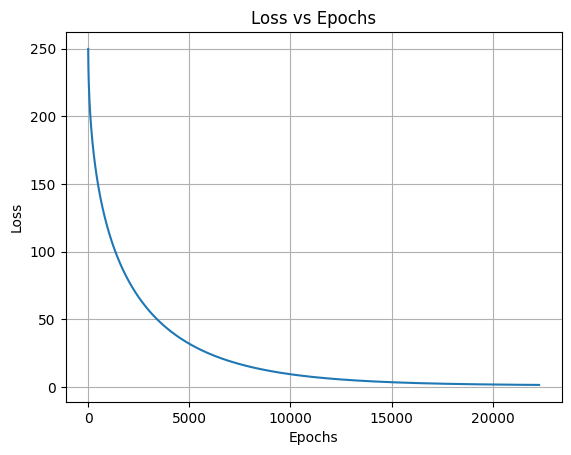

In [36]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

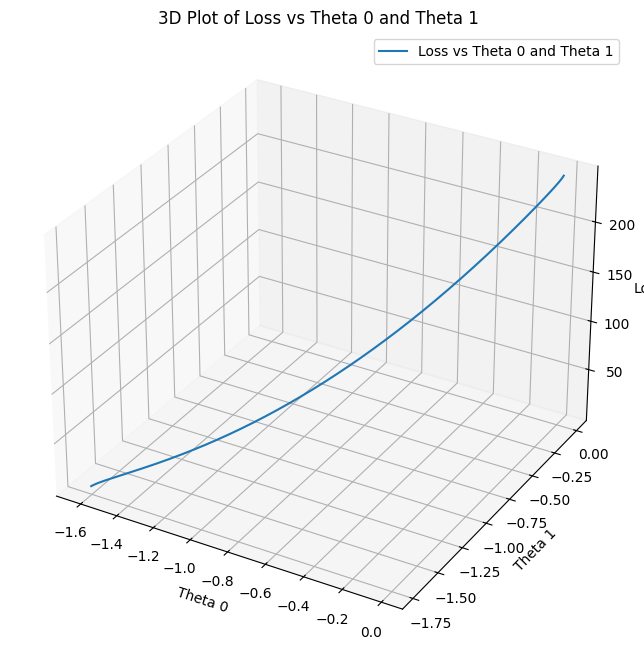

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(theta0, theta1, loss, label='Loss vs Theta 0 and Theta 1')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Loss')
ax.set_title('3D Plot of Loss vs Theta 0 and Theta 1')
ax.legend()
plt.show()

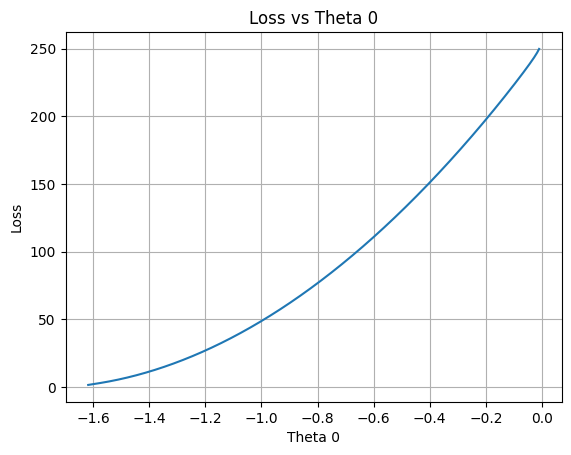

In [38]:
plt.plot(theta0,loss)
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Loss vs Theta 0')
plt.grid()
plt.show()


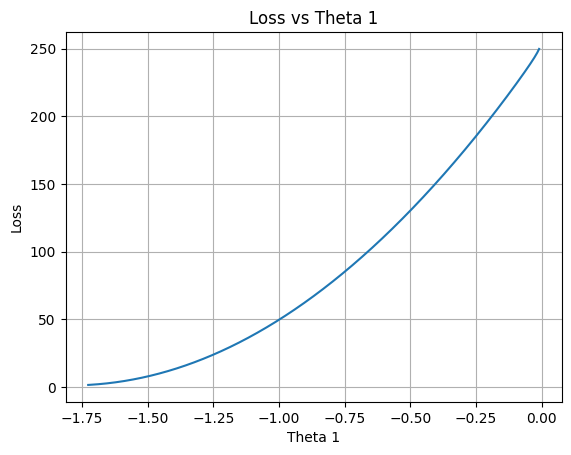

In [39]:
plt.plot(theta1,loss)
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Loss vs Theta 1')
plt.grid()
plt.show()

In [40]:
plot_3d(x, y, theta0, theta1, loss)

#### Plot all regression lines till converge

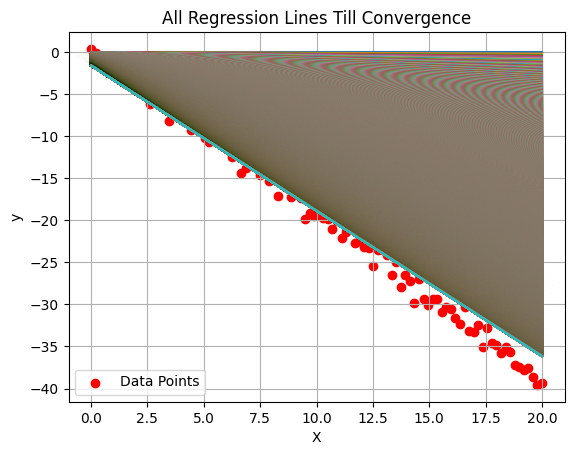

In [41]:
for i in range(len(ypred)):
    plt.plot(x, ypred[i])

plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines Till Convergence')
plt.legend()
plt.grid()
plt.show()

#### Plot the best regression line

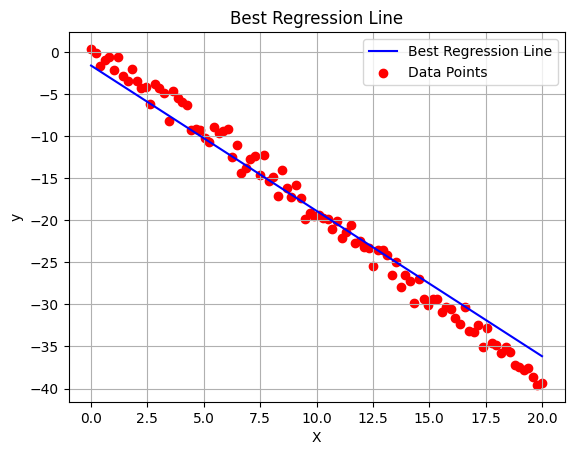

In [42]:
best_ypred = theta_0 + theta_1 * x

plt.plot(x, best_ypred, label='Best Regression Line', color='blue')
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Regression Line')
plt.legend()
plt.grid()
plt.show()

### Update your Batch GD for one variable  implementation to be RMSProp and check your results

In [43]:
def RMSPropBGD(X, Y, alpha, max_iter, beta, epsilon):
    theta_0 = 0
    theta_1 = 0
    tol = 1e-4
    epochs = 0
    loss = []
    theta0 = []
    theta1 = []
    ypred = []
    E_g0 = 0
    E_g1 = 0
    
    for i in range(max_iter):
        y_pred = theta_0 + theta_1 * X
        ypred.append(y_pred)
        
        J = (1/(2*len(X))) * np.sum((y_pred - Y)**2)
        loss.append(J)

        grad_0 = (1/len(X)) * np.sum(y_pred - Y)
        grad_1 = (1/len(X)) * np.sum((y_pred - Y) * X)

        E_g0 = beta * E_g0 + (1 - beta) * grad_0**2
        E_g1 = beta * E_g1 + (1 - beta) * grad_1**2

        theta_0 = theta_0 - (alpha / (np.sqrt(E_g0) + epsilon)) * grad_0
        theta_1 = theta_1 - (alpha / (np.sqrt(E_g1) + epsilon)) * grad_1
        theta0.append(theta_0)
        theta1.append(theta_1)

        if len(loss) > 1 and abs(loss[-2] - loss[-1]) <= tol:
            print(f"Converged after {i+1} iterations.")
            break

        epochs += 1

    return theta0, theta1, loss, ypred, theta_0, theta_1, epochs

In [44]:
theta0, theta1, loss, ypred, theta_0, theta_1, epochs = RMSPropBGD(x, y, 0.01, 1000, 0.9, 1e-8)

Converged after 475 iterations.


In [45]:
r2_score(y, ypred[-1])

0.9924231250503899

In [46]:
SS_tot = np.sum((y - np.mean(y))**2)
SS_res = np.sum((y - ypred[-1])**2)
R2 = 1 - (SS_res/SS_tot)
R2

0.9924231250503899

#### Plot loss vs. epochs

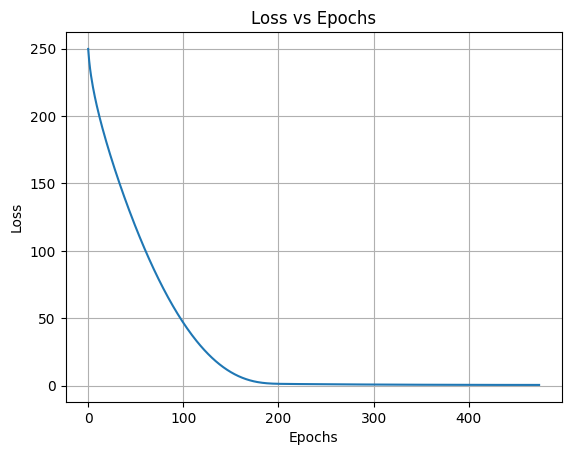

In [47]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

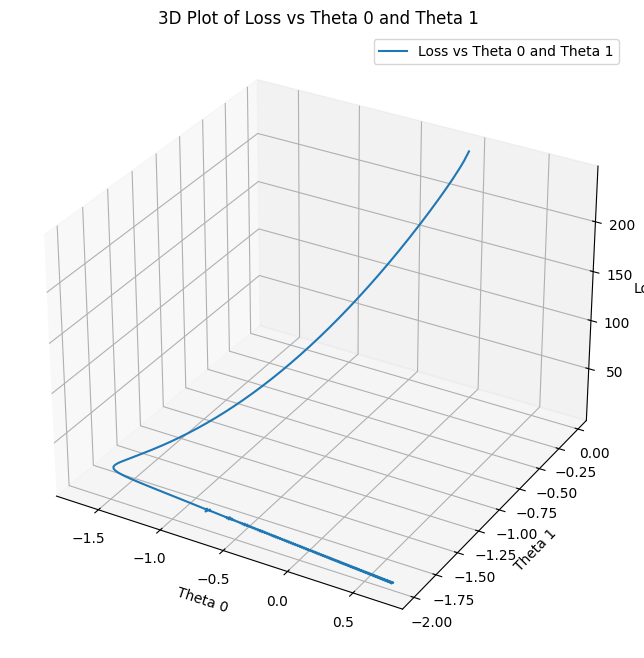

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(theta0, theta1, loss, label='Loss vs Theta 0 and Theta 1')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Loss')
ax.set_title('3D Plot of Loss vs Theta 0 and Theta 1')
ax.legend()
plt.show()

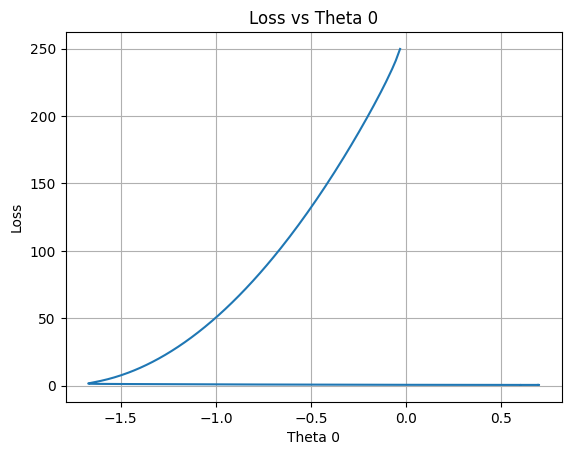

In [49]:
plt.plot(theta0,loss)
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Loss vs Theta 0')
plt.grid()
plt.show()


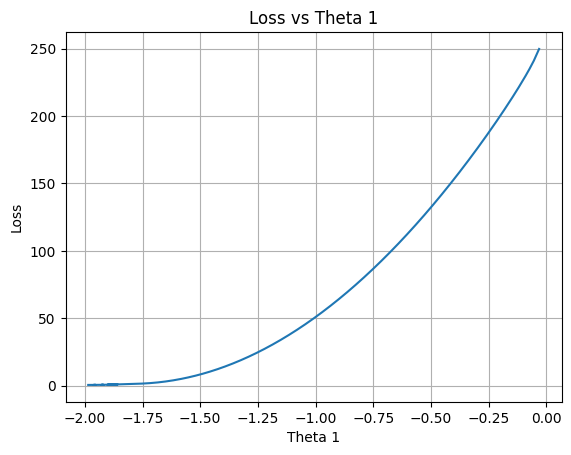

In [50]:
plt.plot(theta1,loss)
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Loss vs Theta 1')
plt.grid()
plt.show()

In [51]:
plot_3d(x, y, theta0, theta1, loss)

#### Plot all regression lines till converge

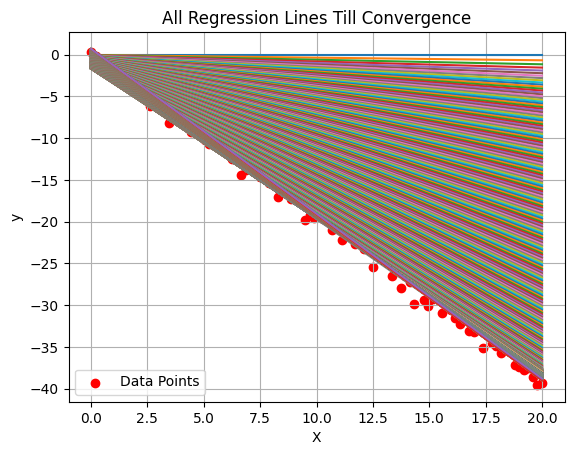

In [52]:
for i in range(len(ypred)):
    plt.plot(x, ypred[i])

plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines Till Convergence')
plt.legend()
plt.grid()
plt.show()

#### Plot the best regression line

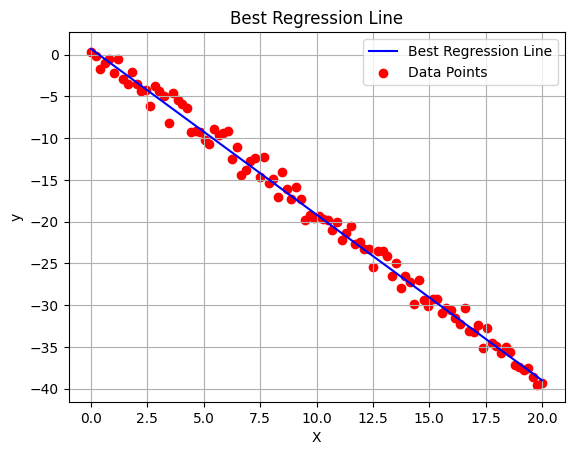

In [53]:
best_ypred = theta_0 + theta_1 * x

plt.plot(x, best_ypred, label='Best Regression Line', color='blue')
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Regression Line')
plt.legend()
plt.grid()
plt.show()

### Update your Batch GD for one variable  implementation to be ADAM and check your results

In [54]:
def AdamBGD(X, Y, alpha, max_iter, beta1, beta2, epsilon):
    theta_0 = 0
    theta_1 = 0
    tol = 1e-4
    epochs = 0
    loss = []
    theta0 = []
    theta1 = []
    ypred = []
    m0 = 0
    m1 = 0
    v0 = 0
    v1 = 0
    t = 0
    
    for i in range(max_iter):
        t += 1
        y_pred = theta_0 + theta_1 * X
        ypred.append(y_pred)
        
        J = (1/(2*len(X))) * np.sum((y_pred - Y)**2)
        loss.append(J)

        grad_0 = (1/len(X)) * np.sum(y_pred - Y)
        grad_1 = (1/len(X)) * np.sum((y_pred - Y) * X)

        m0 = beta1 * m0 + (1 - beta1) * grad_0
        m1 = beta1 * m1 + (1 - beta1) * grad_1
        v0 = beta2 * v0 + (1 - beta2) * (grad_0**2)
        v1 = beta2 * v1 + (1 - beta2) * (grad_1**2)

        m0_hat = m0 / (1 - beta1**t)
        m1_hat = m1 / (1 - beta1**t)
        v0_hat = v0 / (1 - beta2**t)
        v1_hat = v1 / (1 - beta2**t)

        theta_0 = theta_0 - (alpha / (np.sqrt(v0_hat) + epsilon)) * m0_hat
        theta_1 = theta_1 - (alpha / (np.sqrt(v1_hat) + epsilon)) * m1_hat
        theta0.append(theta_0)
        theta1.append(theta_1)

        if len(loss) > 1 and abs(loss[-2] - loss[-1]) <= tol:
            print(f"Converged after {i+1} iterations.")
            break

        epochs += 1

    return theta0, theta1, loss, ypred, theta_0, theta_1, epochs

In [55]:
theta0, theta1, loss, ypred, theta_0, theta_1, epochs = AdamBGD(x, y, 0.01, 1000, 0.9, 0.999, 1e-8)

In [56]:
r2_score(y, ypred[-1])

0.9860409094267888

In [57]:
SS_tot = np.sum((y - np.mean(y))**2)
SS_res = np.sum((y - ypred[-1])**2)
R2 = 1 - (SS_res/SS_tot)
R2

0.9860409094267888

#### Plot loss vs. epochs

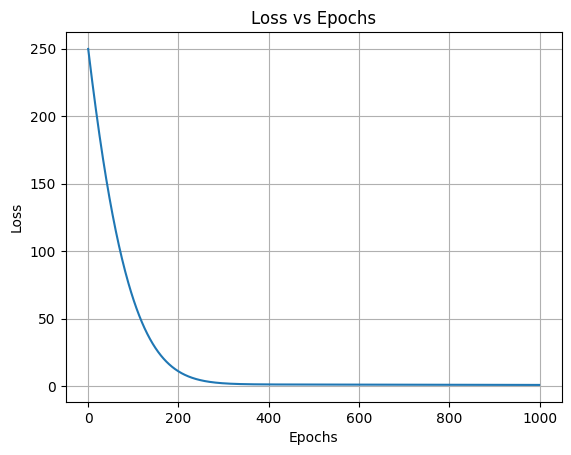

In [58]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

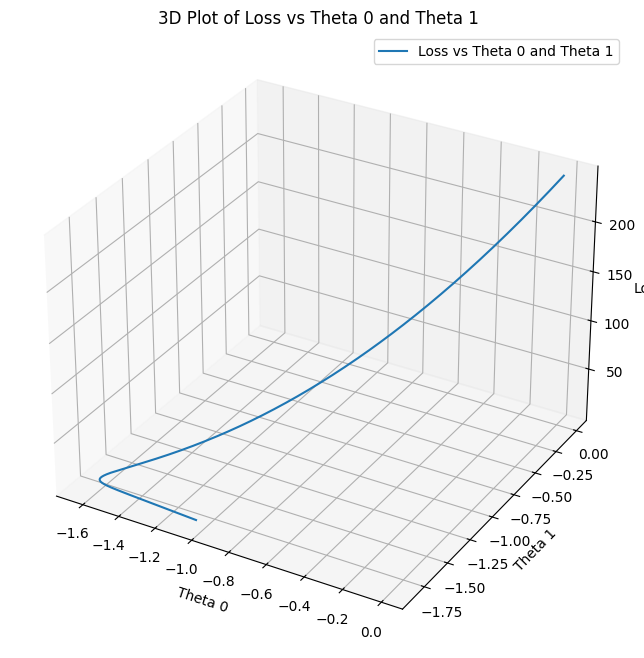

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(theta0, theta1, loss, label='Loss vs Theta 0 and Theta 1')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Loss')
ax.set_title('3D Plot of Loss vs Theta 0 and Theta 1')
ax.legend()
plt.show()

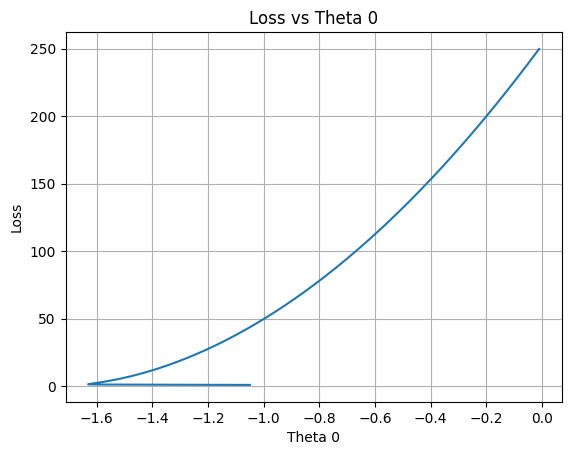

In [60]:
plt.plot(theta0,loss)
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Loss vs Theta 0')
plt.grid()
plt.show()


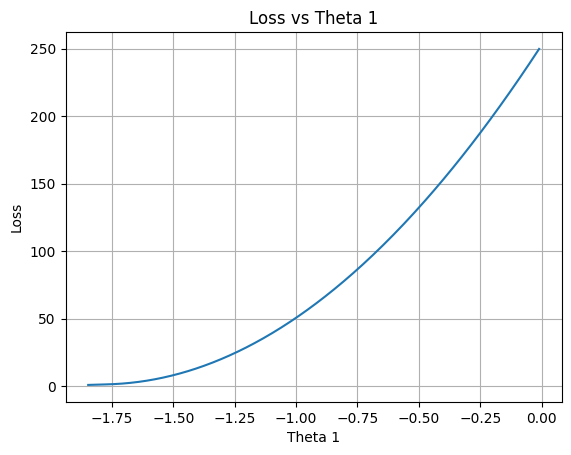

In [61]:
plt.plot(theta1,loss)
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Loss vs Theta 1')
plt.grid()
plt.show()

In [62]:
plot_3d(x, y, theta0, theta1, loss)

#### Plot all regression lines till converge

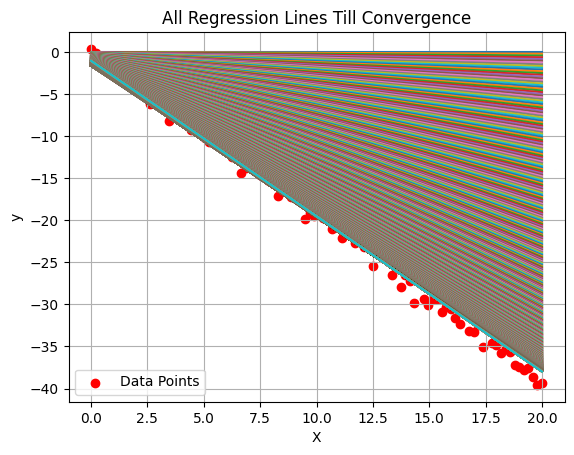

In [63]:
for i in range(len(ypred)):
    plt.plot(x, ypred[i])

plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('All Regression Lines Till Convergence')
plt.legend()
plt.grid()
plt.show()

#### Plot the best regression line

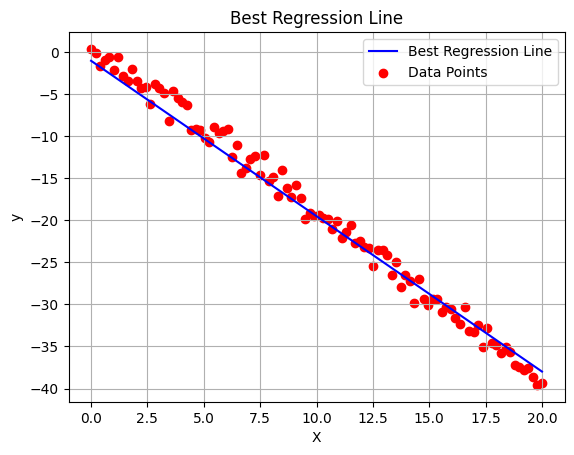

In [64]:
best_ypred = theta_0 + theta_1 * x

plt.plot(x, best_ypred, label='Best Regression Line', color='blue')
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Regression Line')
plt.legend()
plt.grid()
plt.show()

## Congratulations 
